# Graduate Rotational Internship Program
# The Sparks Foundation ( Data Science & Business Analytics Tasks )

## Task 2 : Prediction using Unsupervised ML

**Objective : In this unsupervised task we will predict the optimum number of clusters
              and represent it visually from the given ‘Iris’ dataset.**

# Author : Ritik Kumar

In [1]:
## Imported Necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
data = pd.read_csv('iris.csv')

In [3]:
data.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
20,21,5.4,3.4,1.7,0.2,Iris-setosa
18,19,5.7,3.8,1.7,0.3,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
17,18,5.1,3.5,1.4,0.3,Iris-setosa
10,11,5.4,3.7,1.5,0.2,Iris-setosa
48,49,5.3,3.7,1.5,0.2,Iris-setosa
116,117,6.5,3.0,5.5,1.8,Iris-virginica
124,125,6.7,3.3,5.7,2.1,Iris-virginica
60,61,5.0,2.0,3.5,1.0,Iris-versicolor
118,119,7.7,2.6,6.9,2.3,Iris-virginica


In [4]:
## Check for Null Values.

data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
## Show Some Basics Statistical Details.

data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [6]:
## Drop id columns
data.drop(['Id'],axis=1,inplace=True)

In [7]:
## More info About Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


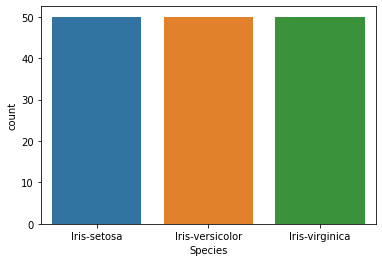

In [8]:
## Visualize the Number of Different Species
sns.countplot(data['Species'])

## Univariate Analysis

In [9]:
df = data.drop(['Species'],axis=1)

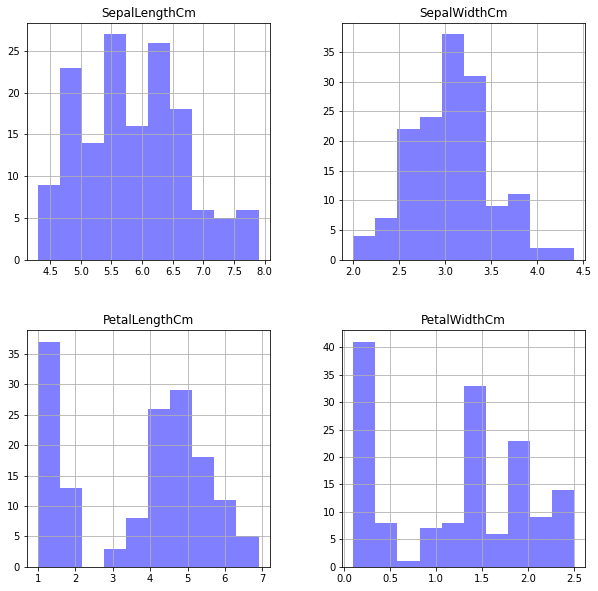

In [10]:
## Distribution of Sepal (length/Width) and Petal (length/Width)

df.hist(color='b', alpha=0.5, figsize=(10,10));

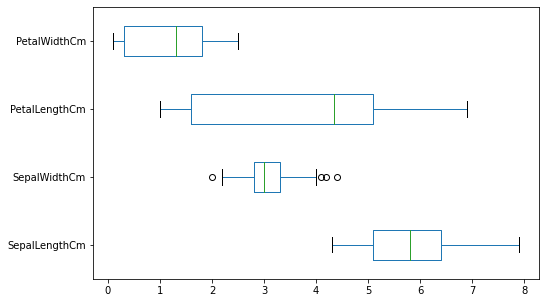

In [11]:
## Boxplot shows us the Outliers and first (lower) quartile, median, third (upper) quartile.

df.plot(kind='box',figsize=(8,5),vert=False)

## Multivariate Analysis

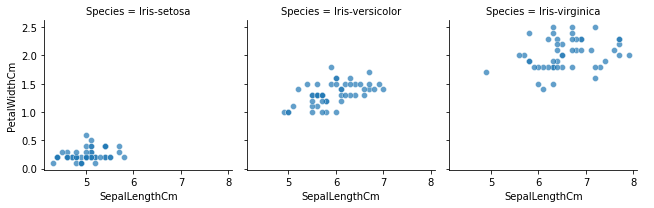

In [12]:
g = sns.FacetGrid(data, col="Species");
g.map(sns.scatterplot, "SepalLengthCm","PetalWidthCm",alpha=.7);
g.add_legend()


**Iris-sentosa has sorter SepalLength and PetalWidth, whereas Iris-virginica has longest SepalLength and PetalWidth.**

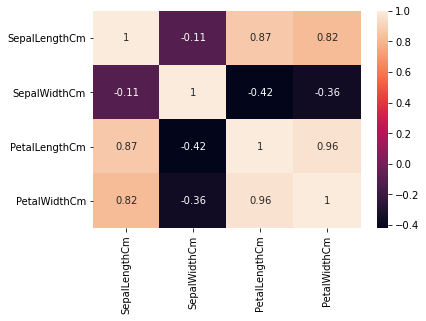

In [13]:
## Shows Correlation between Features.

sns.heatmap(df.corr(), annot=True)

**PetalLength and PetalWidth are highly positively Correalated whereas, PetalLength and SepalWidth are negatively correlated.**

## Cluster Model:

In [14]:
## Implement the K-Means Clustering Machine Learning Algorithm.

from sklearn.cluster import KMeans


## The elbow method

In [15]:
## This Method helps us to find the number of clusters.
X = data.iloc[:,[0,1,2,3]].values
k_rng = range(1,10)
sse = []  #Error Sum of Squares
for k in k_rng:
    model = KMeans(n_clusters=k)
    model.fit(X)
    sse.append(model.inertia_)

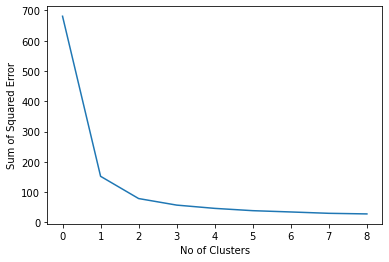

In [16]:
plt.plot(sse)
plt.xlabel('No of Clusters')
plt.ylabel('Sum of Squared Error')
plt.show()

In [17]:
model = KMeans(n_clusters=3)
y_kmeans = model.fit_predict(X)

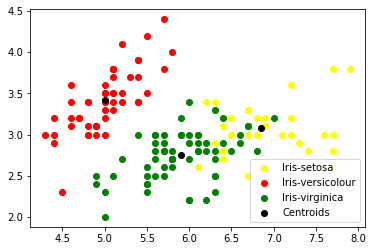

In [18]:
## Plotting the Clusters using Scatterplot.

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], c = 'yellow', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], c = 'red', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], c = 'green', label = 'Iris-virginica')
# Plotting the centroids of the clusters

plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], c = 'black', label = 'Centroids')
plt.legend()
plt.show()



## Thank You